x = [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
y = [ 1423  2714  3554  4586  5806  7153  9074 11177 13522 16678 19655 22112
 24953 27100 29631 31728 33366 48206]
f(x) =        4         3        2
2.112 x - 118.4 x + 2446 x - 1.979e+04 x + 5.624e+04
r square= 0.9828534172332999
  1 days 		64433
  2 days 		78437
  3 days 		95993
  4 days 		117733
  5 days 		144340
  6 days 		176548
  7 days 		215143
  8 days 		260958
  9 days 		314880
 10 days 		377846
 11 days 		450843
 12 days 		534909
 13 days 		631132
 14 days 		740652
 15 days 		864658
 16 days 		1004392
 17 days 		1161145
 18 days 		1336259
 19 days 		1531126
 20 days 		1747190
 21 days 		1985946
 22 days 		2248937
 23 days 		2537759
 24 days 		2854059
 25 days 		3199533
 26 days 		3575929
 27 days 		3985045
 28 days 		4428729
 29 days 		4908882
 30 days 		5427453
 31 days 		5986444
 32 days 		6587906
 33 days 		7233940
 34 days 		7926701
 35 days 		8668392
 36 days 		9461266
 37 days 		10307630
 38 days 		11209839
 3

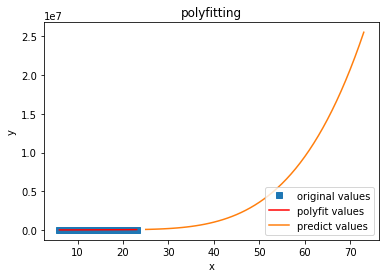

In [127]:
import time, json, requests  
url = 'https://view.inews.qq.com/g2/getOnsInfo?name=disease_h5&callback;=&_=%d'%int(time.time()*1000)  
data = json.loads(requests.get(url=url).json()['data'])  
last=0
a=[]
for each in data:
    if each == "dailyDeadRateHistory":
        for _ in data[each]:
            temp = _['hubeiConfirm']
            new=temp-last
            last = _['hubeiConfirm']
            a.append(new)


length=len(a)
after_days = 6
power = 4
b = [sum(a[0:i+1]) for i in range(after_days, length)]
import numpy as np
import matplotlib.pyplot as plt
x = [i for i in range(after_days, len(a))]
x = np.array(x)
print('x =',x)
y = np.array(b)
print('y =',y)
f1 = np.polyfit(x, y, power)
p1 = np.poly1d(f1)
print('f(x) =', p1)
yvals = p1(x)
#print('fitvalue =',yvals)
from sklearn.metrics import r2_score
print('r square=', r2_score(y, yvals))

print("="*32)
p_x=[]
p_y=[]
max_count_day=50
for i in range(1, max_count_day):
    print("%3d days \t\t%d"%(i,int(p1(24+i))))
    p_x.append(i+length)
    p_y.append(int(p1(length+i)))
print(p_x)
print(p_y)

print("="*32+"prediction\n\n")
p_x = np.array(p_x)
p_y = np.array(p_y)
plot1 = plt.plot(x, y, 's',label='original values')
plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
plot3 = plt.plot(p_x,p_y,label="predict values")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4)
plt.title('polyfitting')
plt.show()